In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Let's read in the penguin csv and take a peek at the columns.

In [3]:
filename = 'penguin.csv'

df = pd.read_csv(filename)
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


Those column names are a mess! Let's clean them up before we get going.

In [4]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head()

,studyname,sample_number,species,region,island,stage,individual_id,clutch_completion,date_egg,culmen_length_(mm),culmen_depth_(mm),flipper_length_(mm),body_mass_(g),sex,delta_15_n_(o/oo),delta_13_c_(o/oo),comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


What's in our dataset?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyname            344 non-null    object 
 1   sample_number        344 non-null    int64  
 2   species              344 non-null    object 
 3   region               344 non-null    object 
 4   island               344 non-null    object 
 5   stage                344 non-null    object 
 6   individual_id        344 non-null    object 
 7   clutch_completion    344 non-null    object 
 8   date_egg             344 non-null    object 
 9   culmen_length_(mm)   342 non-null    float64
 10  culmen_depth_(mm)    342 non-null    float64
 11  flipper_length_(mm)  342 non-null    float64
 12  body_mass_(g)        342 non-null    float64
 13  sex                  334 non-null    object 
 14  delta_15_n_(o/oo)    330 non-null    float64
 15  delta_13_c_(o/oo)    331 non-null    flo

I noticed a few null values in the dataset. It's hard to quantify from the .info(). How many nulls do we have total?

In [6]:
df.isna().sum()

studyname                0
sample_number            0
species                  0
region                   0
island                   0
stage                    0
individual_id            0
clutch_completion        0
date_egg                 0
culmen_length_(mm)       2
culmen_depth_(mm)        2
flipper_length_(mm)      2
body_mass_(g)            2
sex                     10
delta_15_n_(o/oo)       14
delta_13_c_(o/oo)       13
comments               290
dtype: int64

That's an incredible number of nulls in the comments column. Let's take a peek at the column so see what's happening there.

In [7]:
df.comments[:10]

0           Not enough blood for isotopes.
1                                      NaN
2                                      NaN
3                       Adult not sampled.
4                                      NaN
5                                      NaN
6    Nest never observed with full clutch.
7    Nest never observed with full clutch.
8                No blood sample obtained.
9     No blood sample obtained for sexing.
Name: comments, dtype: object

For the purpose of our project (clustering on physical characteristics of penguins), it doesn't look like this column will be useful. If I went ahead and dropped all null values, I would hardly have any observations left! Let's drop the column before continuing.

In [8]:
df = df.drop(columns=['comments'])
df.isna().sum()

studyname               0
sample_number           0
species                 0
region                  0
island                  0
stage                   0
individual_id           0
clutch_completion       0
date_egg                0
culmen_length_(mm)      2
culmen_depth_(mm)       2
flipper_length_(mm)     2
body_mass_(g)           2
sex                    10
delta_15_n_(o/oo)      14
delta_13_c_(o/oo)      13
dtype: int64

Now that the problematic column is out of the way, let's drop remaining observations with null values.

In [9]:
df = df.dropna()
df.isna().sum()

studyname              0
sample_number          0
species                0
region                 0
island                 0
stage                  0
individual_id          0
clutch_completion      0
date_egg               0
culmen_length_(mm)     0
culmen_depth_(mm)      0
flipper_length_(mm)    0
body_mass_(g)          0
sex                    0
delta_15_n_(o/oo)      0
delta_13_c_(o/oo)      0
dtype: int64

We have a clean dataset! Let's look at the value counts for our categorical columns.

In [10]:
for col in df.columns[df.dtypes == 'object']:
    print(df[col].value_counts())
    print()
    print('--------------------')
    print()

PAL0910    117
PAL0809    113
PAL0708     95
Name: studyname, dtype: int64

--------------------

Adelie Penguin (Pygoscelis adeliae)          139
Gentoo penguin (Pygoscelis papua)            119
Chinstrap penguin (Pygoscelis antarctica)     67
Name: species, dtype: int64

--------------------

Anvers    325
Name: region, dtype: int64

--------------------

Biscoe       163
Dream        119
Torgersen     43
Name: island, dtype: int64

--------------------

Adult, 1 Egg Stage    325
Name: stage, dtype: int64

--------------------

N69A1    3
N22A2    3
N23A2    3
N24A2    3
N28A1    3
        ..
N68A1    1
N26A1    1
N84A2    1
N84A1    1
N43A2    1
Name: individual_id, Length: 188, dtype: int64

--------------------

Yes    291
No      34
Name: clutch_completion, dtype: int64

--------------------

2007-11-27    18
2008-11-09    15
2009-11-18    14
2007-11-16    13
2008-11-13    12
2008-11-04    12
2008-11-06    12
2009-11-21    12
2009-11-15    10
2009-11-22    10
2009-11-16    10
200

Now let's take a look at the continuous features. We will use these for clustering in later lessons!

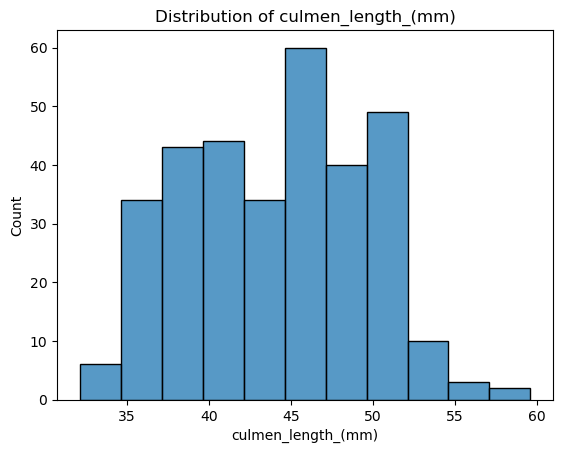

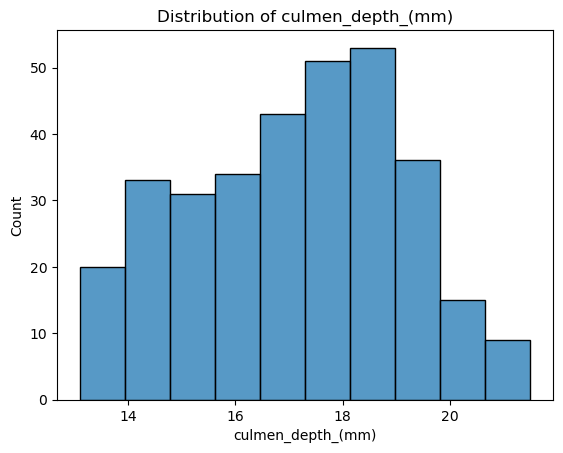

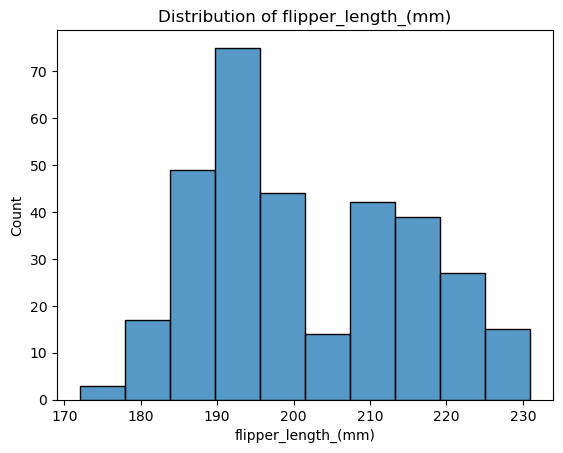

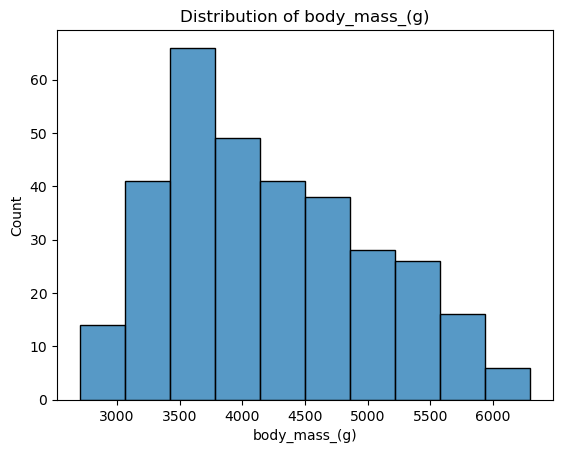

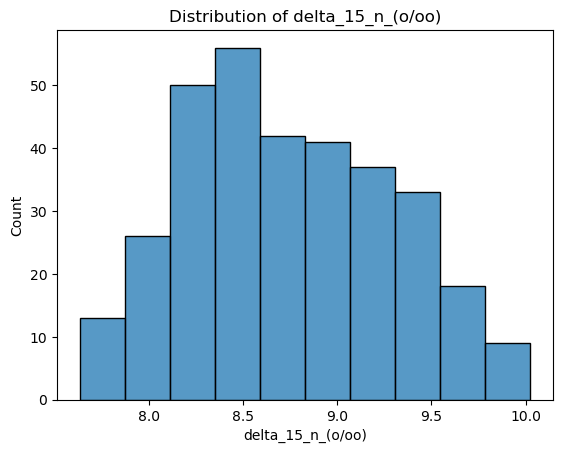

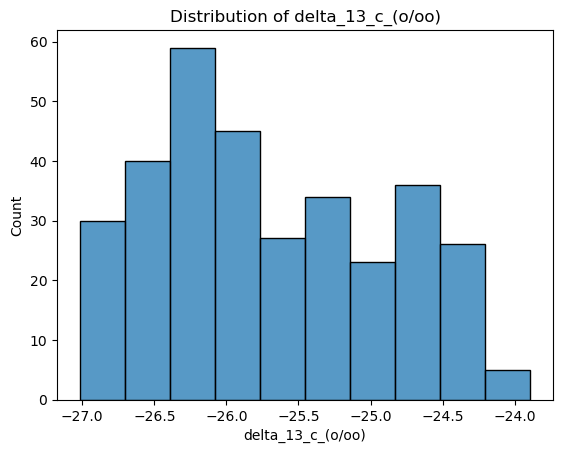

In [11]:
for col in df.columns[df.dtypes == 'float64']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=df, x=col)
    plt.show()

Let's calculate the IQR for one specific column.

In [12]:
q1, q3 = df['culmen_length_(mm)'].quantile([0.25, 0.75])
iqr = q3 - q1

Let's take a peek at the IQR. 50% of this column's values fall within this range.

In [13]:
iqr

9.200000000000003

Using the IQR, we can calculate the upper and lower fences for outliers.

In [14]:
lower_bound = q1 - iqr * 1.5
upper_bound = q3 + iqr * 1.5
lower_bound, upper_bound

(25.699999999999996, 62.50000000000001)

Using my favorite np.where(), we can determine if there are any outliers in this specific column.

In [15]:
np.where((df['culmen_length_(mm)'] > upper_bound) | (df['culmen_length_(mm)'] < lower_bound), 1, 0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

If I wanted to repeat this operation across multiple columns.. What could I do?

In [16]:
def identify_outliers(col, k=1.5):
    
    q1, q3 = col.quantile([0.25, 0.75])
    
    iqr = q3 - q1
    
    lower_fence = q1 - iqr * k
    upper_fence = q3 + iqr * k
    
    return np.where((col < lower_fence) | (col > upper_fence), 1, 0)

In [17]:
for col in df.columns[df.dtypes == 'float64']:
    
    df[f'{col}_outliers'] = identify_outliers(df[col])
    
df.head()    

,studyname,sample_number,species,region,island,stage,individual_id,clutch_completion,date_egg,culmen_length_(mm),...,body_mass_(g),sex,delta_15_n_(o/oo),delta_13_c_(o/oo),culmen_length_(mm)_outliers,culmen_depth_(mm)_outliers,flipper_length_(mm)_outliers,body_mass_(g)_outliers,delta_15_n_(o/oo)_outliers,delta_13_c_(o/oo)_outliers
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,...,3800.0,FEMALE,8.94956,-24.69454,0,0,0,0,0,0
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,...,3250.0,FEMALE,8.36821,-25.33302,0,0,0,0,0,0
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,...,3450.0,FEMALE,8.76651,-25.32426,0,0,0,0,0,0
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,2007-11-16,39.3,...,3650.0,MALE,8.66496,-25.29805,0,0,0,0,0,0
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,38.9,...,3625.0,FEMALE,9.18718,-25.21799,0,0,0,0,0,0


In [18]:
df.mean(numeric_only=True)

sample_number                     64.756923
culmen_length_(mm)                44.054769
culmen_depth_(mm)                 17.123077
flipper_length_(mm)              201.264615
body_mass_(g)                   4216.000000
delta_15_n_(o/oo)                  8.737794
delta_13_c_(o/oo)                -25.690217
culmen_length_(mm)_outliers        0.000000
culmen_depth_(mm)_outliers         0.000000
flipper_length_(mm)_outliers       0.000000
body_mass_(g)_outliers             0.000000
delta_15_n_(o/oo)_outliers         0.000000
delta_13_c_(o/oo)_outliers         0.000000
dtype: float64